In [1]:
import torch 
print(torch.cuda.is_available())
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

True


In [2]:
def simulator(x, t=3):
    x0, v0 = x[:2], x[2:]
    a = torch.tensor([0, -9.81])
    v = v0 + a*t
    x = x0 + v0*t + .5*a*t**2
    return torch.cat((x,v))

In [3]:
x0 = torch.tensor([0, 0])
v0 = torch.tensor([10, 10])
x = torch.cat([x0, v0])

b = simulator(x, t=3)
print(b)

tensor([ 30.0000, -14.1450,  10.0000, -19.4300])


### Our aim
To minimize the following function by finding a suitable `x`, 
$$\arg\min_x \|A(x)-b\|^2_2$$

To reconstruct the 3d model, you can imagine there is an imaginary model which takes in `x` as angle and returns `A(x)` as reconstructed 3d projection. It is then compared with `b` as expected projection. The model `A` should represent the 3d voxel itself.

In [4]:
x = torch.tensor([0., 0., 0., 0.], requires_grad=True)
optim = torch.optim.SGD({x}, lr=1e-3)
training_loss = []
for epoch in range(1000):
    Ax = simulator(x, t=3)
    loss = ((Ax-b)**2).mean()
    optim.zero_grad()
    loss.backward()
    optim.step()
    training_loss.append(loss.item())

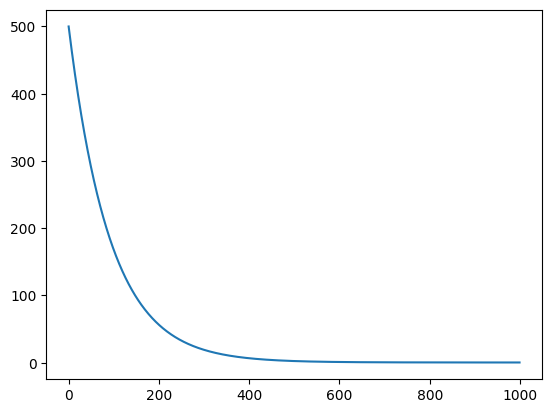

Prediction:  [2.6375482 2.6375484 9.159265  9.159265 ] [ 30.114653 -14.030348   9.159016 -20.270985]
Original:  [ 0  0 10 10] [ 30.    -14.145  10.    -19.43 ]


In [5]:
plt.plot(training_loss)
plt.show()
print("Prediction: ", x.detach().numpy(), Ax.detach().numpy())
print("Original: ", torch.cat([x0, v0]).numpy(), b.numpy())